In [1]:
## Sonification of cats' images

In [45]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal, fft
from scipy.io.wavfile import write

import os



In [50]:
directory = './artemis/'
files=os.listdir(directory)

In [51]:
print(files)
print(len(files))

['IMG_9019.jpeg', 'IMG_7191.jpeg', '6D645EAC-C70F-4603-8996-3E59C3EF415F.jpg', 'IMG_6098.jpeg', 'IMG_4157.jpeg']
5


In [52]:
from sklearn import cluster, decomposition
from numpy.random import RandomState
from sklearn.datasets import fetch_olivetti_faces
import logging

In [57]:
#make an array of images
images = []
for file in files:
    image = io.imread(directory + file)
    images.append(image)

In [60]:
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        print("vmax")
        im = ax.imshow(
            #vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

6
400 4096
Dataset consists of 400 faces


/var/folders/dv/j6sfp1517qq653wf_c37rzrr0000gp/T/ipykernel_18227/921228070.py:23: RuntimeWarning: overflow encountered in scalar negative
  vmin=-vmax,


TypeError: Axes.imshow() missing 1 required positional argument: 'X'

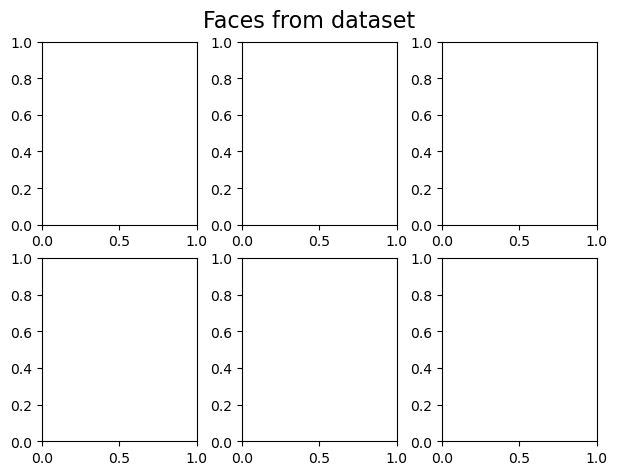

In [61]:
rng = RandomState(0)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
n_samples, n_features = faces.shape
print(n_components)
faces=images
print (n_samples, n_features)

# Global centering (focus on one feature, centering all samples)
#faces_centered = faces - faces.mean(axis=0)

# Local centering (focus on one sample, centering all features)
#faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

plot_gallery("Faces from dataset", faces[:n_components])

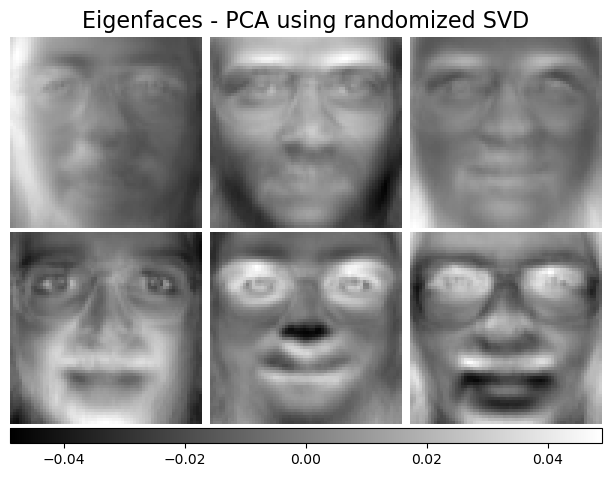

In [40]:
pca_estimator = decomposition.PCA(
    n_components=n_components, svd_solver="randomized", whiten=True
)
pca_estimator.fit(faces_centered)
plot_gallery(
    "Eigenfaces - PCA using randomized SVD", pca_estimator.components_[:n_components]
)